# Численное решение модифицированного уравнения теплопроводности

Рассмотрим одномерный гармонический кристалл длины $L$.

Уравнение теплопроводности, описывающее процесс теплопередачи в рассматриваемом кристалле:

$$\displaystyle{}\frac{\partial^2 T}{\partial t^2}+\frac{1}{t}\frac{\partial T}{\partial t}=c^2\frac{\partial^2 T}{\partial x^2},$$

где $T(x,t)$ - функция температуры от координаты $x$ и времени $t$; $c$ - скорость звука в одномерном кристалле

Зададим распределение температуры по длине кристалла в начальный момент времени и функции температуры (от времени) на концах кристалла:

1) $T|_{t=0}=T(x,0)=T_0(x)$ (начальное условие на функцию температуры)

2) $\dot{T}|_{t=0}=\dot{T}(x,0)=0$ (начальное условие на производную функции температуры)

3) $T(0,t)=T_0(t)$ (граничное условие первого рода на левом конце)

4) $T(L,t)=T_L(t)$ (граничное условие первого рода на правом конце)


Решаем уравнение явным методом. Представим производные в виде конечных разностей

$$\displaystyle{}\frac{\partial T}{\partial t}\bigg|_{x_m,t_n}=\frac{T_m^{n+1}-T_m^n}{\tau}$$

$$\displaystyle{}\frac{\partial^2 T}{\partial t^2}\bigg|_{x_m,t_n}=\frac{T_m^{n-1}-2T_m^n+T_m^{n+1}}{\tau^2}$$

$$\displaystyle{}\frac{\partial^2 T}{\partial x^2}\bigg|_{x_m,t_n}=\frac{T_{m-1}^n-2T_m^n+T_{m+1}^n}{\tau^2}$$

$$\displaystyle{}\frac{1}{t}\bigg|_{t_n}=\frac{1}{n\tau}$$

Подставляем в исходное уравнение:

$$\displaystyle{}\frac{T_m^{n-1}-2T_m^n+T_m^{n+1}}{\tau^2}+\frac{1}{n\tau}\frac{T_m^{n+1}-T_m^n}{\tau}=c^2\frac{T_{m-1}^n-2T_m^n+T_{m+1}^n}{h^2}$$

Преобразуем:

$$\displaystyle{}\frac{n\left(T_m^{n-1}-2T_m^n\right)+\left(n+1\right)T_m^{n+1}-T_m^n}{n\tau^2}=c^2\frac{T_{m-1}^n-2T_m^n+T_{m+1}^n}{h^2}$$

$$\displaystyle{}\left(n+1\right)T_m^{n+1}=\frac{c^2n\tau^2}{h^2}\left(T_{m-1}^n-2T_m^n+T_{m+1}^n\right)-n\left(T_m^{n-1}-2T_m^n\right)+T_m^n$$

И получаем формулу явной схемы:

$$\displaystyle{}T_m^{n+1}=\frac{T_m^n}{n+1}-\frac{n}{n+1}\left(T_m^{n-1}-2T_m^n\right)+\frac{c^2n\tau^2}{(n+1)h^2}\left(T_{m-1}^n-2T_m^n+T_{m+1}^n\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
# from matplotlib import cm, colors

ipympl_spec = importlib.util.find_spec('ipympl')
found = ipympl_spec is not None

if found:
    %matplotlib widget
else:
    %matplotlib notebook

In [2]:
# задаём значения входных параметров

c = 1  # скорость звука в кристалле
total_time = 1.5  # время протекания процесса
L = 5  # длина кристалла
height = 1000  # количество ячеек по времени
width = 1000  # количество ячеек по пространству

tau = total_time / height  # шаг по времени
h = L / width  # шаг по пространству

print('Шаг по времени: ', tau)
print('Шаг по пространству', h)


Шаг по времени:  0.0015
Шаг по пространству 0.005


In [3]:
def specify_initial_and_boundary(mesh_width, mesh_height, initial, der_initial, boundary_1, boundary_2):
    """
    Задание граничных и начальных условий
    :param mesh_width: количество ячеек по пространству
    :param mesh_height: количество ячеек по времени
    :param initial: начальное условие (функция от координаты)
    :param der_initial: начальное условие на производную по времени (функция от координаты)
    :param boundary_1: граничное условие первого рода на левом конце (функция от времени)
    :param boundary_2: граничное условие первого рода на правом конце (функция от времени)
    :return: массив со значениями температуры (заданы начальные и граничные условия)
    """

    T_values = np.zeros([mesh_height + 1, mesh_width + 1])
    der_T_values = np.zeros([mesh_height + 1, mesh_width + 1])

    for i in range(mesh_width + 1):
        T_values[0, i] = initial(i)
        T_values[1, i] = der_initial(i) * initial(i)
        der_T_values[0, i] = der_initial(i)
        
    for k in range(mesh_height + 1):
        T_values[k, 0] = boundary_1(k)
        T_values[k, width] = boundary_2(k)
    
    return T_values

In [4]:
def explicit_scheme(T_values, time_step, space_step, c_value):
    """
    Реализация явной схемы интегрирования модифицированного уравнения теплопроводности
    :param T_values: массив со значениями температуры, в котором заданы начальные и граничные условия
    :param time_step: шаг по времени
    :param space_step: шаг по пространству
    :param c_value: скорость звука в кристалле
    :return: массив со значениями температуры в разных точках кристалла в разные моменты времени
    """
    for n in range(1, T_values.shape[0]-1):
        for m in range(1, T_values.shape[1]-1):
            T_values[n+1][m] = T_values[n][m]/(n+1) - n/(n+1)*(T_values[n-1][m]-2*T_values[n][m])+\
                c_value**2*n*time_step**2/((n+1)*space_step**2)*(T_values[n][m-1]-2*T_values[n][m]+T_values[n][m+1])
    
    return T_values

In [5]:
# функции начальных условий и граничных условий первого рода

def gauss(x, alpha=5, median=L/2):
    return np.exp(-alpha * (x * h - median)**2)

def one(x):
    return 1

def zero(x):
    return 0

def step(x, l_dist=0.5, A=5, full_length=L, mesh_width=width):
    if x >= (1/l_dist)/full_length * mesh_width and x <= (full_length-1/l_dist)/full_length * mesh_width:
        return A
    else:
        return 0


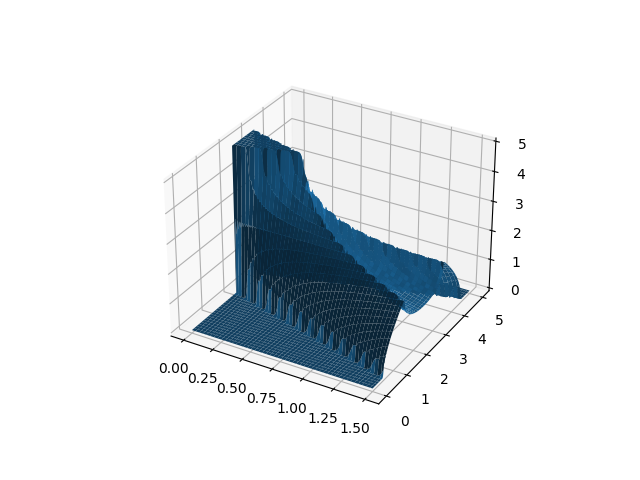

In [6]:
T_explicit = specify_initial_and_boundary(width, height, step, one, zero, zero)
T_explicit = explicit_scheme(T_explicit, tau, h, c)

fig1 = plt.figure()
ax1 = plt.axes(projection='3d')
Length, Time = np.meshgrid(np.linspace(0, L, width+1), np.linspace(0, total_time, height+1))
ax1.plot_surface(Time, Length, T_explicit)

In [7]:
#for k in range(1, height + 1):
#    for i in range(1, width):
#        der_T[k, i] = (1 - 1/k) * der_T[k-1, i] + c**2*dt/h**2 * (T[k-1, i+1] - 2 * T[k-1, i] + T[k-1, i-1])
#        T[k, i] = T[k-1, i] + der_T[k, i] * dt

Решаем исходное уравнение неявным методом. Представим производные в виде конечных разностей:

$$\displaystyle{}\frac{\partial T}{\partial t}\bigg|_{x_m,t_n}=\frac{T_m^{n+1}-T_m^n}{\tau}$$

$$\displaystyle{}\frac{\partial^2 T}{\partial t^2}\bigg|_{x_m,t_n}=\frac{T_m^{n-1}-2T_m^n+T_m^{n+1}}{\tau^2}$$

$$\displaystyle{}\frac{\partial^2 T}{\partial x^2}\bigg|_{x_m,t_n}=\frac{T_{m-1}^{n+1}-2T_m^{n+1}+T_{m+1}^{n+1}}{\tau^2}$$

$$\displaystyle{}\frac{1}{t}\bigg|_{t_n}=\frac{1}{n\tau}$$

Подставляем в исходное уравнение

$$\displaystyle{}\frac{T_m^{n-1}-2T_m^n+T_m^{n+1}}{\tau^2}+\frac{1}{n\tau}\frac{T_m^{n+1}-T_m^n}{\tau}=c^2\frac{T_{m-1}^{n+1}-2T_m^{n+1}+T_{m+1}^{n+1}}{h^2}$$

Преобразуем:

$$\displaystyle{}\frac{(n+1)T_m^{n+1}-(2n+1)T_m^n+nT_m^{n-1}}{n\tau^2}=\frac{c^2}{h^2}\left(T_{m-1}^{n+1}-2T_m^{n+1}+T_{m+1}^{n+1}\right)$$

Получаем СЛАУ неявной схемы:

$$\displaystyle{}-\frac{c^2}{h^2}T_{m-1}^{n+1}+\left(\frac{n+1}{n\tau^2}+\frac{2c^2}{h^2}\right)T_m^{n+1}-\frac{c^2}{h^2}T_{m+1}^{n+1}=\frac{(2n+1)T_m^n-nT_m^{n-1}}{n\tau^2}$$


In [8]:
def implicit_scheme(T_values, time_step, space_step, c_value):
    """
    Реализация неявной схемы интегрирования модифицированного уравнения теплопроводности (трёхдиагональная СЛАУ решается методом прогонки)
    :param T_values: массив со значениями температуры, в котором заданы начальные и граничные условия
    :param time_step: шаг по времени
    :param space_step: шаг по пространству
    :param c_value: скорость звука в кристалле
    :return: массив со значениями температуры в разных точках кристалла в разные моменты времени
    """
    for n in range(1, T_values.shape[0]-1):
        alpha = np.zeros([T_values.shape[1]])
        beta = np.zeros([T_values.shape[1]])

        # решаем методом прогонки
        for m in range(T_values.shape[1]):

            # для модифицированного уравнения теплопроводности
            B = c_value**2/space_step**2
            C = (n+1)/(n*time_step**2) + 2*c_value**2/space_step**2
            A = c_value**2/space_step**2
            F = ((2 * n + 1) * T_values[n][m] - n * T_values[n-1][m])/(n*time_step**2)

            # для волнового уравнения
            #B = 1/space_step**2
            #C = (2*c_value**2*time_step**2+space_step**2)/(space_step**2*c_value**2*time_step**2)
            #A = 1/space_step**2
            #F = (2*T[n][m]-T[n-1][m])/(c_value**2*time_step**2)

            # для уравнения теплопроводности
            #B = time_step/space_step**2
            #C = 1+2*time_step/space_step**2
            #A = time_step/space_step**2
            #F = T[n][m]

            alpha[m] = B / (C - A * alpha[m-1])
            beta[m] = (A * beta[m-1] + F)/(C - A * alpha[m-1])


        for m in range(width-1, 0, -1):
            T_values[n+1][m-1] = alpha[m-1] * T_values[n+1][m] + beta[m-1]
    
    return T_values

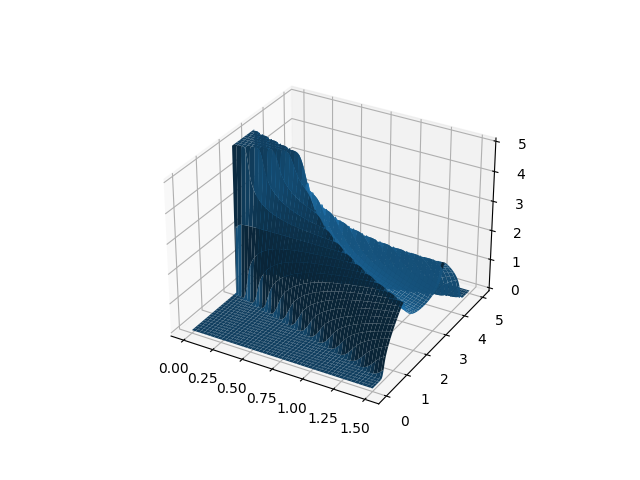

In [9]:
T_implicit = specify_initial_and_boundary(width, height, step, one, zero, zero)
T_implicit = implicit_scheme(T_implicit, tau, h, c)

fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
Length, Time = np.meshgrid(np.linspace(0, L, width+1), np.linspace(0, total_time, height+1))
ax2.plot_surface(Time, Length, T_implicit)

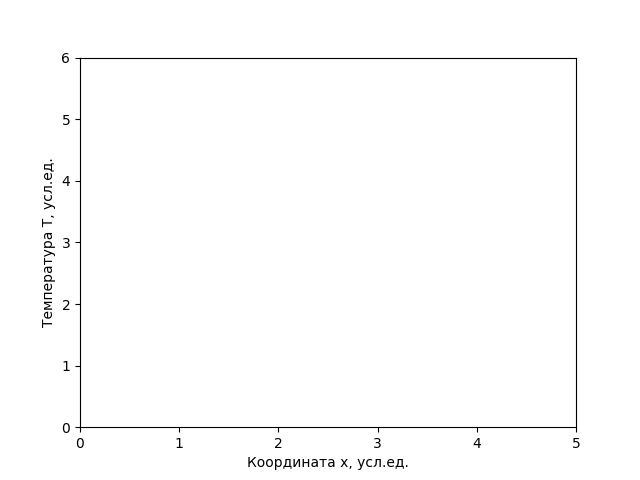

In [10]:
from matplotlib.animation import FuncAnimation


fig3 = plt.figure()
ax3 = plt.axes()
line1, = ax3.plot([])
line2, = ax3.plot([])
ax3.set_xlim(0,L)
ax3.set_ylim(0,6)
ax3.set_xlabel('Координата x, усл.ед.')
ax3.set_ylabel('Температура T, усл.ед.')

def animate(frame_num):
    line1.set_data((np.array(range(len(T_implicit)))*h, T_implicit[frame_num]))
    line2.set_data((np.array(range(len(T_explicit)))*h, T_explicit[frame_num]))
    ax3.set_title('Распределение температуры по длине кристалла, время '+str(round(frame_num*tau,2))+' усл.ед.')
    return line1, line2

anim = FuncAnimation(fig3, animate, frames=height, interval=5, repeat=False)
plt.show()